<a href="https://colab.research.google.com/github/k3vvv/Data110/blob/main/Project_2_Opioid_Abuse_Kevin_Miele.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression Line

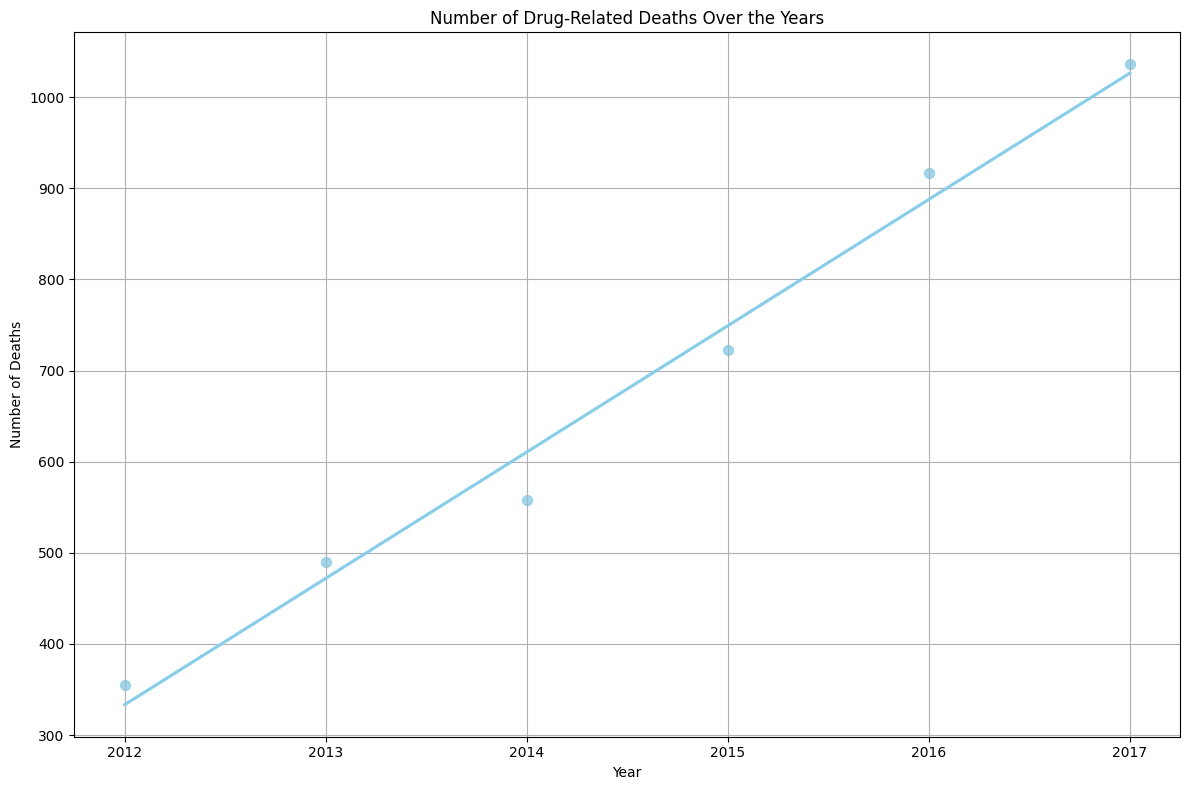

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import BytesIO
import requests

# Dataset from Google Drive
file_id = '1KlhC4sto3j9Vi7C6M21xDcGaG7vGMgGb'
url = f'https://drive.google.com/uc?id={file_id}'
response = requests.get(url)
drug_deaths_data = pd.read_csv(BytesIO(response.content))

# Convert 'Date' column to datetime format
drug_deaths_data['Date'] = pd.to_datetime(drug_deaths_data['Date'])

# Extract year from the 'Date' column
drug_deaths_data['Year'] = drug_deaths_data['Date'].dt.year

# Group data by year and count the number of deaths for each year
deaths_by_year = drug_deaths_data.groupby('Year').size().reset_index(name='Number of Deaths')

# Regression line
plt.figure(figsize=(12, 8))
sns.regplot(x='Year', y='Number of Deaths', data=deaths_by_year, scatter_kws={"s": 50}, ci=None, color='skyblue')
plt.title('Number of Drug-Related Deaths Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()

Drug Related Deaths by Location in Conneticut (CT)

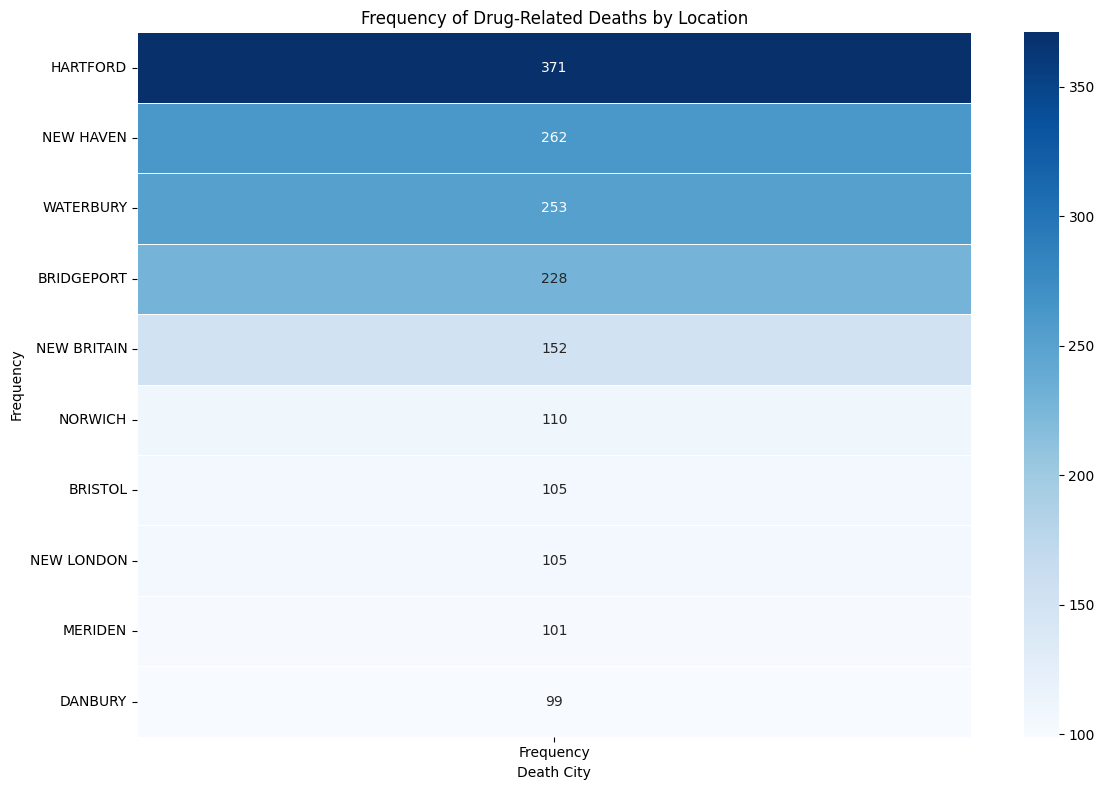

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import BytesIO
import requests

# Dataset from Google Drive
file_id = '1KlhC4sto3j9Vi7C6M21xDcGaG7vGMgGb'
url = f'https://drive.google.com/uc?id={file_id}'
response = requests.get(url)
drug_deaths_data = pd.read_csv(BytesIO(response.content))

# Location data (Death City) and count the frequency of each location
location_counts = drug_deaths_data['Death City'].value_counts()

# Select the top N most common locations
top_n = 10  # Change this value if you want to display more or fewer locations
top_locations = location_counts.head(top_n)

# Filter the dataset to include only the top locations
filtered_data = drug_deaths_data[drug_deaths_data['Death City'].isin(top_locations.index)]

# Group the filtered data by location and count the number of deaths for each location
heatmap_data = filtered_data.groupby(['Death City']).size().reset_index(name='Frequency')

# Sort the data by frequency
heatmap_data = heatmap_data.sort_values(by='Frequency', ascending=False)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data=heatmap_data.set_index('Death City'), cmap='Blues', annot=True, fmt='g', linewidths=0.5)
plt.title('Frequency of Drug-Related Deaths by Location')
plt.xlabel('Death City')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Pie Chart for Distribution of Gender in Opioid-Related Deaths

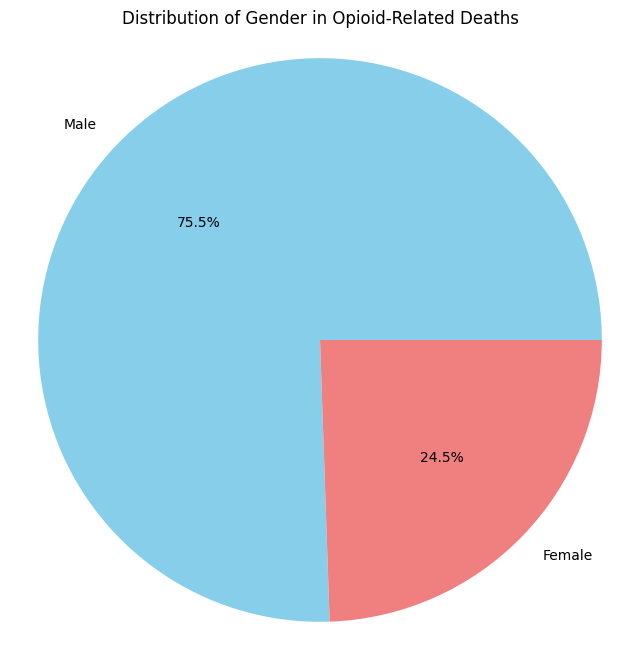

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
import requests

# Dataset from Google Drive
file_id = '1KlhC4sto3j9Vi7C6M21xDcGaG7vGMgGb'
url = f'https://drive.google.com/uc?id={file_id}'
response = requests.get(url)
drug_deaths_data = pd.read_csv(BytesIO(response.content))

# Filter the dataset to include only opioid-related deaths
opioid_deaths_data = drug_deaths_data[drug_deaths_data['Any Opioid'] == 'Y']

# Count the number of deaths by gender
gender_counts = opioid_deaths_data['Sex'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Gender in Opioid-Related Deaths')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Box Plot of Distribution of Age by Race in Opioid-Related Deaths:

<ipython-input-39-892bf0bb174b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Race', y='Age', data=opioid_deaths_data, palette='Set3')


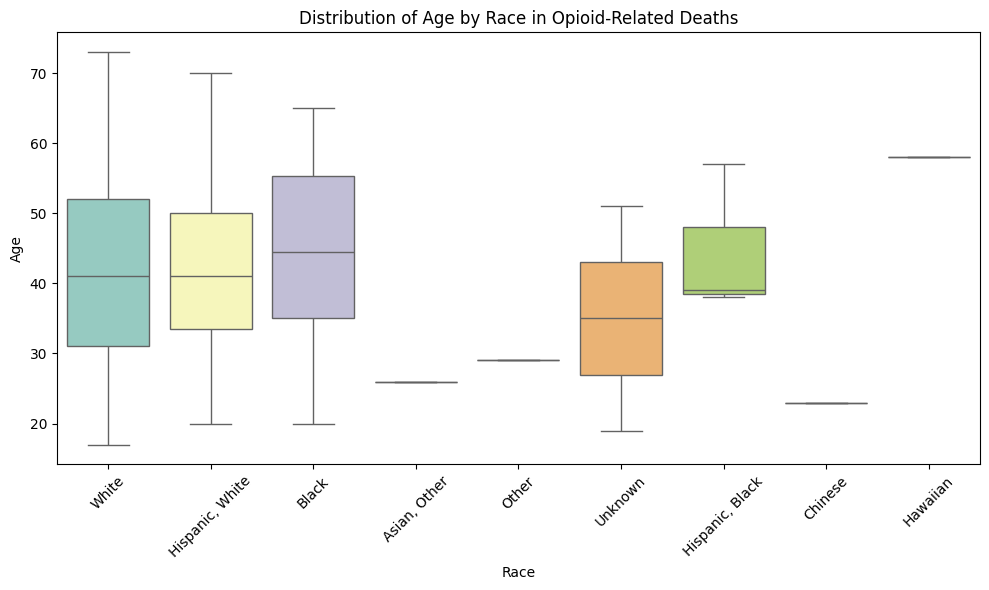

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import BytesIO
import requests

# Dataset from Google Drive
file_id = '1KlhC4sto3j9Vi7C6M21xDcGaG7vGMgGb'
url = f'https://drive.google.com/uc?id={file_id}'
response = requests.get(url)
drug_deaths_data = pd.read_csv(BytesIO(response.content))

# Filter the dataset to include only opioid-related deaths
opioid_deaths_data = drug_deaths_data[drug_deaths_data['Any Opioid'] == 'Y']

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(x='Race', y='Age', data=opioid_deaths_data, palette='Set3')

# Title and labels
plt.title('Distribution of Age by Race in Opioid-Related Deaths')
plt.xlabel('Race')
plt.ylabel('Age')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()